In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report as cr


In [ ]:
df_ = pd.read_csv("/content/drive/MyDrive/AI/possum.csv")

In [ ]:
df_.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
df_.shape

(104, 14)

In [ ]:
df = df_.drop(labels=["sex", "case", "site", "Pop"], axis=1)

In [ ]:
df.head()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
df_nans_drop = df.dropna()
print(df_nans_drop.shape)

(101, 10)


In [ ]:
df_nans_fill = df.fillna(df.mean())

In [ ]:
#convert data to x and y
df_x1 = df_nans_fill.drop(labels=["age"] , axis=1)
df_y = df_nans_fill["age"]

In [ ]:
#normalize the dataset
scaler = StandardScaler()
x_nrm = scaler.fit_transform(df_x1)
y = df_y.values

In [ ]:
# create train and test data
x_train,x_test,y_train,y_test = train_test_split(x_nrm , y , train_size=0.8)

In [ ]:
#create network
model = Sequential()
model.add(Dense(64 , activation="linear" , input_shape=x_train.shape[1:]))
model.add(Dense(16 , activation="relu"))
model.add(Dense(1 , activation="linear"))
model.compile(optimizer="adam" , loss="mae")
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,697 (6.63 KB)

 Trainable params: 1,697 (6.63 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
results = model.fit(x_train , y_train , epochs=20 , validation_data=(x_test,y_test))

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 2.8961 - val_loss: 2.8119
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.7270 - val_loss: 2.7247
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.6185 - val_loss: 2.6455
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.5209 - val_loss: 2.5723
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.4491 - val_loss: 2.4970
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.3373 - val_loss: 2.4453
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.3359 - val_loss: 2.4046
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.0711 - val_loss: 2.3669
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.1722 - val_loss: 2.3301
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 2.1998 - val_loss: 2.2965
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 2.0088 - val_loss: 2.2675
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.8970 - val_loss: 2.2289
E

In [ ]:
yhat_train = model.predict(x_train).round()
yhat_test  = model.predict(x_test).round()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


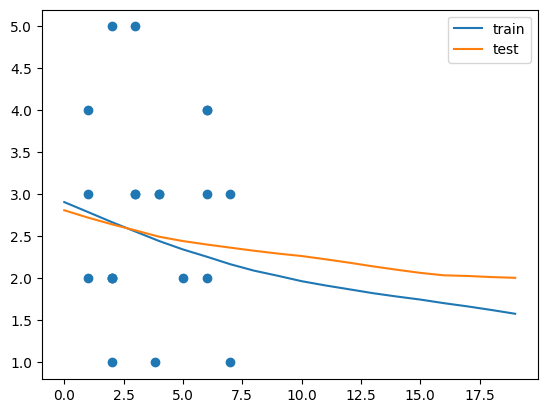

In [ ]:
plt.plot(results.history["loss"] , label="train")
plt.plot(results.history["val_loss"] , label="test")
plt.legend()

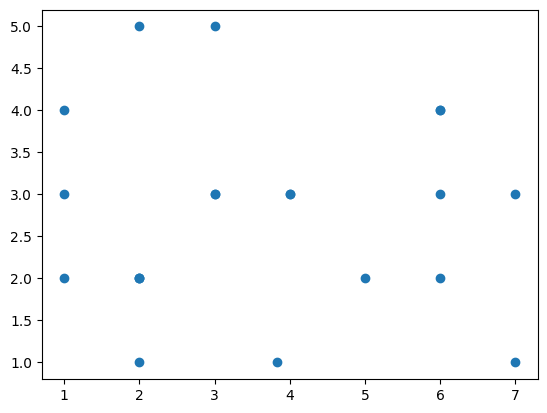

In [ ]:
plt.scatter(y_test , yhat_test)
